# MATH 3480 - Machine Learning
# 08 Decision Trees

## Reading
* Geron, Chapter 6
* Brunton, Section 5.8 [Video](https://www.youtube.com/watch?v=fsE9gzbf8Z4)
* James, Chapter 8

## Uses
* Classification

## How it works
Look at each variable in the data. 
* For categorical data, you can separate (or branch) the data into the categories for a variable
* For numerical data, you can create a boundary, and classify the data by whether it is greater than or less than that boundary

Parts of a decision tree
* Node: Split the value of a certain attribute (the variable being tested for a split)
* Edge: Possible outcomes of each node that leads to the next node
* Root: The first node
* Leaves: The final nodes that predict the outcome

How do we know which split to look at first?
* Entropy
* Information Gain

### Entropy

### Information Gain

## Example
Take the Iris dataset, and create a model to separate the data by category.

We have four primary variables:
* $x_1$: sepal length
* $x_2$: sepal width
* $x_3$: petal length
* $x_4$: petal width

Here is a plot of the data:

/var/folders/qk/b_fqr8c925l80p4m9dkk0wth0000gn/T/ipykernel_18257/950522929.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


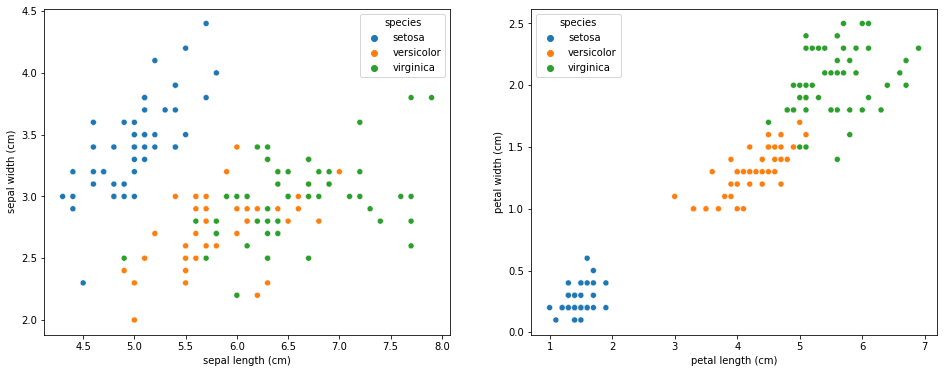

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 6)
from sklearn import datasets

iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
species = pd.DataFrame(iris_data['target'], columns=['species_num'])

def test_species(x):
    if x==0: return "setosa"
    if x==1: return "versicolor"
    if x==2: return "virginica"

iris['species'] = species['species_num'].apply(lambda x: test_species(x))

fig, ax =plt.subplots(1,2)
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species', ax=ax[1])
sns.scatterplot(data = iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue='species', ax=ax[0])
fig.show()

Now, we find the best separation for our first branch. 
* Looking at the sepal width and length, there is no clear vertical line ($x_1$) or horizontal line ($x_2$) that can separate the data. 
* Looking at the petal width and length, there is a very clear separation in the petal length at $x_3=2.5$. 
  * There is also a clear separation in the petal width at $x_4 = 0.75$. 
  * The separation in $x_3$ is wider, so we'll use that as our first classification.

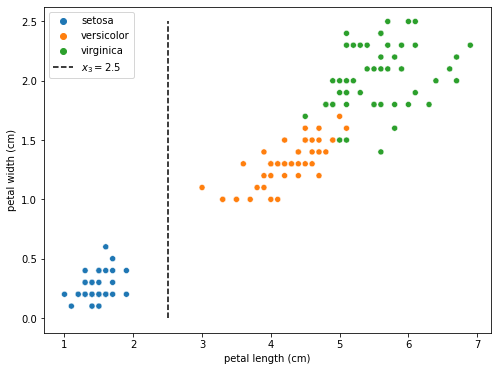

In [21]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species')
plt.plot((2.5,2.5),(0,2.5), color='k', linestyle='--', label='$x_3=2.5$')
plt.legend()

Our second branch will be to separate the Versicolor and Virginica species. The best separation would be a horizontal line around $x_4 = 1.75$.

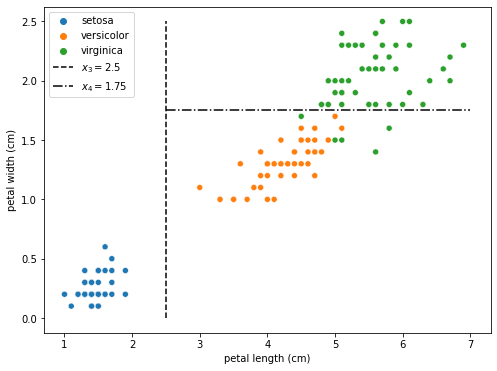

In [17]:
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species')
plt.plot((2.5,2.5),(0,2.5), color='k', linestyle='--', label='$x_3=2.5$')
plt.plot((2.5,7),(1.75,1.75), color='k', linestyle='-.', label='$x_4=1.75$')
plt.legend()

But this wasn't a perfect separation. There are some Virginica results in the Versicolor region.
* Create another separation to best separate the data around $x_3 = 4.95$.

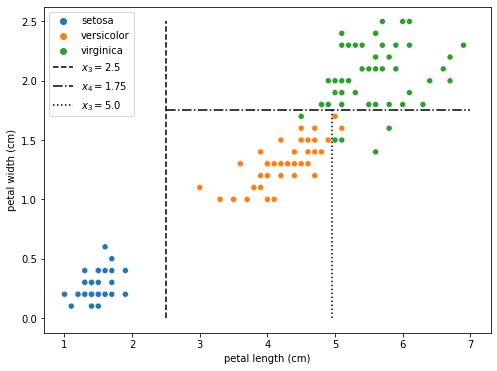

In [27]:
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species')
plt.plot((2.5,2.5),(0,2.5), color='k', linestyle='--', label='$x_3=2.5$')
plt.plot((2.5,7),(1.75,1.75), color='k', linestyle='-.', label='$x_4=1.75$')
plt.plot((4.95,4.95),(0,1.75), color='k', linestyle=':', label='$x_3=5.0$')
plt.legend()

Even though this isn't perfect, we really only have 3 misclassifications. This creates a pretty good model for the iris flowers.

So, the decision tree would look something like this:

[![](https://mermaid.ink/img/pako:eNpdkMFqwkAQhl9lmLMGlIo0B0FN7EWkVLCUbA5DdposTXZlszmUJO_ejY0QndPA_83HzLSYGckYYm7pWsDxQ2jwtW3f2VEJR9a5K2ADy2DVjxHM5xvovrjuYDdin0reqEWwfsJOpoN9cmZnakr_k91EECcXZXOlVUYpPMTDYPS8xUvwevdHE8thYnlIB8lbcmFbq8yUxqY4w4ptRUr6k9uBFegKrlhg6FtJ9keg0L3nmqskx7FUzlgMv6mseYbUOHP-1RmGzjZ8hyJF_n3VSPV_HExqUw)](https://mermaid-js.github.io/mermaid-live-editor/edit#pako:eNpdkMFqwkAQhl9lmLMGlIo0B0FN7EWkVLCUbA5DdposTXZlszmUJO_ejY0QndPA_83HzLSYGckYYm7pWsDxQ2jwtW3f2VEJR9a5K2ADy2DVjxHM5xvovrjuYDdin0reqEWwfsJOpoN9cmZnakr_k91EECcXZXOlVUYpPMTDYPS8xUvwevdHE8thYnlIB8lbcmFbq8yUxqY4w4ptRUr6k9uBFegKrlhg6FtJ9keg0L3nmqskx7FUzlgMv6mseYbUOHP-1RmGzjZ8hyJF_n3VSPV_HExqUw)